In [5]:
SCOPETYPE = 'OPENADC'
PLATFORM = 'CW308_STM32F4'
SS_VER = 'SS_VER_1_1'

In [6]:
%run "../jupyter/Setup_Scripts/Setup_Generic.ipynb"

INFO: Found ChipWhisperer😍


In [212]:
%%bash -s "$PLATFORM" "$SS_VER"
cd ../tracescapture/kyber-basemul
make PLATFORM=$1 CRYPTO_TARGET=NONE SS_VER=$2

SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
make[1]: '.dep' is up to date.
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
.
Welcome to another exciting ChipWhisperer target build!!
arm-none-eabi-gcc (15:10.3-2021.07-4) 10.3.1 20210621 (release)
Copyright (C) 2020 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

.
Compiling:
-en     main.c ...
-e Done!
.
Compiling:
-en     ../../hardware/victims/firmware/./simpleserial/simpleserial.c ...
-e Done!
.
Compiling:
-en     ../../hardware/victims/firmware/./hal/stm32f4/stm32f4_hal.c ...


In file included from ../../hardware/victims/firmware/./hal/stm32f4/stm32f4_hal.c:3:
../../hardware/victims/firmware/./hal/stm32f4/stm32f4_hal_lowlevel.h:108: warning: "STM32F415xx" redefined
  108 | #define STM32F415xx
      | 
<command-line>: note: this is the location of the previous definition


-e Done!
.
Compiling:
-en     ../../hardware/victims/firmware/./hal/stm32f4/stm32f4_hal_lowlevel.c ...


In file included from ../../hardware/victims/firmware/./hal/stm32f4/stm32f4_hal_lowlevel.c:39:
../../hardware/victims/firmware/./hal/stm32f4/stm32f4_hal_lowlevel.h:108: warning: "STM32F415xx" redefined
  108 | #define STM32F415xx
      | 
<command-line>: note: this is the location of the previous definition


-e Done!
.
Compiling:
-en     ../../hardware/victims/firmware/./hal/stm32f4/stm32f4_sysmem.c ...
-e Done!
.
Compiling:
-en     ../../hardware/victims/firmware/./hal/stm32f4/stm32f4xx_hal_rng.c ...
-e Done!
.
Assembling: ../../hardware/victims/firmware/./hal/stm32f4/stm32f4_startup.S
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -x assembler-with-cpp -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -DF_CPU=7372800 -Wa,-gstabs,-adhlns=objdir-CW308_STM32F4/stm32f4_startup.lst -I../../hardware/victims/firmware/./simpleserial/ -I../../hardware/victims/firmware/./simpleserial/ -I../../hardware/victims/firmware/./hal -I../../hardware/victims/firmware/./hal/stm32f4 -I../../hardware/victims/firmware/./hal/stm32f4/CMSIS -I../../hardware/victims/firmware/./hal/stm32f4/CMSIS/core -I../../hardware/victims/firmware/./hal/stm32f4/CMSIS/device -I../../hardware/victims/firmware/./hal/stm32f4/Legacy -I../../hardware/victims/firmware/./crypto/ ../../hardware/victims/firmware/./hal/stm32f4/stm32

In [213]:
cw.program_target(scope, prog, "../tracescapture/kyber-basemul/kyber-{}.hex".format(PLATFORM))

Detected known STMF32: STM32F40xxx/41xxx
Extended erase (0x44), this can take ten seconds or more
Attempting to program 5583 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 5583 bytes


In [19]:
scope.get_name()

'ChipWhisperer Lite'

In [20]:
target.get_simpleserial_commands()

[{'cmd': b'v', 'len': 0, 'flags': 0},
 {'cmd': b'w', 'len': 0, 'flags': 0},
 {'cmd': b'y', 'len': 0, 'flags': 0},
 {'cmd': b'p', 'len': 4, 'flags': 0},
 {'cmd': b'k', 'len': 4, 'flags': 0},
 {'cmd': b'c', 'len': 0, 'flags': 0}]

sk here

In [220]:
from tqdm import tnrange
from tqdm.auto import tqdm
import gc
import numpy as np
import sys
import unittest
import os
import time
import timeit
import pyaes
sys.path.append(r"D:\Github\Python_Kyber")
from aes_drbg import AES_DRBG
from kem import *

sk = "6c,89,2b,02,97,a9,c7,64,14,93,f8,7d,af,35,33,ee,d6,1f,07,f4,65,20,66,33,7e,d7,40,46,dc,c7,1b,a0,3f,30,96,01,03,16,1f,7d,eb,53,a7,1b,11,61,72,63,fe,2a,80,97,69,ce,6d,70,a8,5f,e6,00,ec,e2,9d,7f,36,a1,6d,33,1b,8b,2a,9e,1d,b8,c0,90,74,2d,f0,73,9f,f0,60,ce,b4,ec,c5,ab,1c,5e,55,ac,97,bb,66,a7,f8,95,10,5d,57,78,2b,22,95,38,e3,42,15,44,a3,42,14,08,db,f4,49,10,93,4c,c4,23,77,4f,16,76,ff,1c,30,6f,97,55,5f,57,b4,ae,d7,a6,ba,b9,50,a8,16,3c,8d,31,8d,ea,62,75,1b,d6,ab,c5,06,9c,06,c8,8f,33,00,26,a1,98,06,a0,3b,97,a7,69,6b,56,da,21,82,7b,b4,e8,dc,03,11,52,b4,1b,89,2a,9e,99,ad,f6,e1,96,3e,96,57,88,28,15,4f,46,70,33,84,69,20,fb,b4,b8,05,44,e7,e8,a8,1a,e9,63,cf,36,8c,9b,a0,37,a8,c2,ad,62,e3,2b,6e,61,c9,1d,75,ce,00,5a,b3,0f,80,99,a1,f2,9d,7b,63,05,b4,dc,06,e2,56,80,bb,00,99,2f,71,7f,e6,c1,15,a8,08,42,31,cc,79,dd,70,0e,a6,91,2a,c7,fa,0d,93,7b,b6,a7,56,66,22,30,47,0c,18,9b,5a,a1,65,3d,eb,93,7d,5a,9c,25,a2,1d,93,b1,90,74,fc,23,9d,81,53,53,97,97,c7,d4,ab,62,64,9d,76,aa,55,37,36,a9,49,02,2c,22,c5,2b,ae,ec,60,5b,32,ce,9e,5b,93,84,90,35,58,ca,9d,6a,3a,ba,90,42,3e,ed,a0,1c,94,19,8b,19,2a,8b,a9,06,34,97,a0,c5,01,33,07,dd,d8,63,52,64,71,a4,d9,95,23,eb,41,7f,29,1a,ac,0c,3a,58,1b,6d,a0,07,32,e5,e8,1b,1f,7c,87,9b,16,93,c1,3b,6f,9f,79,31,62,24,29,e5,42,af,40,69,22,2f,04,55,44,e0,cc,4f,b2,4d,44,48,cf,2c,65,96,f5,cb,08,62,4b,11,85,01,3b,6b,02,08,92,f9,6b,df,d4,ad,a9,17,9d,e7,27,b8,d9,42,6e,09,96,b5,d3,49,48,ce,02,d0,c3,69,b3,7c,bb,54,d3,47,9e,d8,b5,82,e9,e7,28,92,9b,4c,71,c9,be,11,d4,5b,20,c4,bd,c3,c7,43,13,22,3f,58,27,4e,8b,a5,24,44,47,c4,95,95,0b,84,cb,0c,3c,27,36,40,10,8a,33,97,94,45,73,27,93,28,99,6c,dc,0c,91,3c,95,8a,d6,20,ba,8b,5e,5e,cb,bb,7e,13,cb,9c,70,bd,5a,b3,0e,b7,48,8c,97,00,1c,20,49,8f,1d,7c,c0,6d,a7,6b,f5,20,c6,58,cc,ad,fa,29,56,42,45,57,ab,ea,8a,b8,92,39,c1,78,33,dc,3a,49,b3,6a,9a,e9,a4,86,94,05,40,eb,44,4f,97,15,23,57,e0,20,35,93,9d,75,a3,c0,25,f4,1a,40,08,23,82,a0,73,3c,39,b0,62,2b,74,0e,40,75,92,c6,2e,ca,eb,14,32,c4,45,b3,70,3a,86,f6,98,1a,27,81,57,ea,95,a6,e9,2d,55,e4,b9,72,f9,36,c2,f0,a6,58,28,0e,a2,b0,7a,48,99,2d,f8,93,7e,0a,2a,c1,dc,c9,74,fe,00,aa,e1,f5,61,fa,25,8e,2d,25,9c,3e,86,1d,ce,23,60,39,12,76,06,fc,1c,e0,09,00,3a,7b,ac,94,21,01,dc,b8,22,b1,f3,c1,2b,f7,32,38,f5,46,e0,1c,36,b5,a6,93,61,92,99,5c,c6,9c,63,23,74,09,cb,53,c2,e3,5d,74,89,0d,18,88,53,76,fa,55,03,b1,07,a2,a3,92,11,5a,ce,0e,64,67,7c,bb,7d,cf,c9,3c,16,d3,a3,05,f6,76,15,a4,88,d7,11,aa,56,69,8c,56,63,ab,7a,c9,ce,66,d5,47,c0,59,5f,98,a4,3f,46,50,bb,e0,8c,36,4d,97,67,89,11,7d,34,f6,ae,51,ac,06,3c,b5,5c,6c,a3,25,58,22,7d,fe,f8,07,d1,9c,30,de,41,44,24,09,7f,6a,a2,36,a1,05,3b,4a,07,a7,6b,e3,72,a5,c6,b6,00,27,91,eb,e0,af,da,f5,4e,1c,a2,37,ff,54,5b,a6,83,43,e7,45,c0,4a,d1,63,9d,bc,59,03,46,b6,b9,56,9b,56,db,bf,e5,31,51,91,30,66,e5,c8,55,27,dc,94,68,11,0a,13,6a,41,14,97,c2,27,dc,b8,c9,b2,55,70,b7,a0,e4,2a,ad,a6,70,9f,23,20,8f,5d,49,6e,ba,b7,84,3f,64,83,bf,0c,0c,73,a4,02,96,ec,2c,64,40,00,13,94,c9,9c,a1,73,d5,c7,75,b7,f4,15,d0,2a,5a,26,a0,74,07,91,85,87,c4,11,69,f2,b7,17,87,55,ac,c2,7f,c8,b1,9c,4c,4b,3f,cd,41,05,3f,2c,74,c8,a1,0a,83,21,24,1b,28,02,43,28,75,ae,80,8b,9e,f1,36,5c,7b,8a,52,90,2f,13,17,ba,2f,b0,26,9f,47,93,06,72,10,7b,47,26,fe,f6,45,47,39,4d,33,20,c8,f1,20,b3,c2,f4,72,5b,03,05,fa,b8,8c,c7,98,1f,cb,09,a7,6a,1c,bf,7f,17,9f,43,bb,0a,4c,8b,05,90,85,7f,1e,69,70,84,66,c7,f8,60,73,91,e7,bc,52,68,bf,d3,d7,a1,df,fc,b4,ec,a2,a1,c9,b5,97,59,30,13,d5,fc,42,02,ec,2b,74,e5,7a,b7,6b,bc,f3,63,2b,ba,f9,7c,dc,41,8a,6f,16,39,28,38,ca,9b,f4,5d,df,02,37,77,b7,56,18,33,c1,05,19,0f,94,f3,02,c5,9b,53,19,00,bb,c8,16,36,1f,aa,5b,33,80,ca,3a,89,31,04,ca,73,88,b1,85,67,1b,3e,5f,e3,79,0e,9a,62,6e,c4,6d,9b,0b,33,c7,a4,19,af,7b,32,b6,85,98,94,f5,75,d8,2a,c5,45,6b,54,90,a7,af,8f,e6,10,46,36,05,89,ec,ba,72,44,23,6f,41,23,11,6b,61,74,aa,17,92,49,a4,91,95,b3,56,c7,2f,c6,64,1f,02,51,81,2e,aa,98,57,0b,04,66,99,07,0e,08,19,dc,27,13,f4,69,13,7d,fc,6a,3d,7b,92,b2,98,99,5e,e7,80,36,91,53,ac,36,6b,06,d7,24,9c,d0,9e,1b,33,78,fb,04,39,9c,ec,b8,65,05,81,d6,37,c7,9a,e6,7d,6f,2c,af,6a,ba,cf,59,81,59,a7,79,2c,b3,c9,71,d1,49,9d,23,73,ad,20,f6,3f,03,bb,59,ed,13,73,84,ac,61,a7,15,51,43,b8,ca,49,32,61,2e,c9,15,e4,ca,34,6a,9b,ce,5d,d6,04,17,c6,b2,a8,9b,1c,c4,35,64,3f,87,5b,dc,5a,7e,5b,34,81,cf,91,9e,a0,91,72,fe,bc,46,d4,fc,3f,b0,cb,95,91,70,4e,e2,db,b6,18,44,b2,f3,31,4a,06,bb,6c,6d,34,00,5e,48,5c,e6,67,bd,c7,d0,98,58,69,28,d2,d9,13,40,f0,04,19,ea,40,13,51,a2,40,a0,b0,41,05,8b,ef,b0,c2,fd,32,64,5b,7a,2d,f8,f5,cb,fd,87,33,27,c9,78,d7,b3,51,a2,80,88,43,88,37,02,4c,52,b9,c2,95,cd,71,36,46,fb,5d,6c,0c,cf,b4,70,73,4a,c2,b2,bc,81,23,c2,c1,3d,f6,93,8e,92,45,5a,86,26,39,fe,b8,a6,4b,85,16,3e,32,70,7e,03,7b,38,d8,ac,39,22,b4,51,87,bb,65,ea,fd,46,5f,c6,4a,0c,5f,8f,3f,90,03,48,94,15,89,9d,59,a5,43,d8,20,8c,54,a3,16,65,29,b5,39,22,7f,fa,d1,bc,8a,f7,3b,7e,87,49,56,b8,1c,2a,2e,f0,bf,ab,e8,dc,93,d7,7b,2f,bc,9e,0c,64,ef,a0,1e,84,8f,5c,0a,1a,83,52,bc,81,9f,fe,56,95,c2,7e,36,f4,76,1e,81,44,83,c8,c5,ab,56,94,85,18,6b,e6,3e,52"

temp = sk.split(",")
sk_array = []
for i in temp:
    sk_array.append(int(i,16))

In [221]:
skpv = polyvec()
unpack_sk(skpv,sk_array)
fsk = list(skpv.vec[0].coeffs)
fsk = fsk[0:2]
fsk

[2412, 696]

In [161]:
sk_array = sk_array[0:4]
sk_array

[108, 137, 43, 2]

In [219]:
sk_array_f = [0,0,0,0]
sk_array_f[1] = fsk[0] & 0xFF
sk_array_f[0] = (fsk[0] >> 8) & 0xFF
sk_array_f[3] = fsk[1] & 0xFF
sk_array_f[2] = (fsk[1] >> 8) & 0xFF
sk_array_f

[9, 108, 2, 184]

In [223]:
text_in_buf = sk_array_f

a = [
    ((text_in_buf[0] << 8) + text_in_buf[1]),
    ((text_in_buf[2] << 8) + text_in_buf[3])
]
a

[2412, 696]

In [23]:
f = open("../tracescapture/kyber-basemul/ct.txt", 'r')
lines = f.readlines()
f.close()

In [24]:
for i in range(len(lines)):
    lines[i] = lines[i][:-1].strip()
lines    

['3f f3 71 03 8c 7c cb 77 f1 d9 86 c1 85 70 3a 64 81 a3 5a e2 fe 61 f3 40 10 2c b3 26 f7 e1 b5 cc 68 fc c9 76 6f 4d 55 4a ff dc 9a 15 36 85 2a ec 89 e3 a7 94 b2 a6 aa 24 35 e5 90 bb 96 3b 30 2d 44 40 0a 5a 91 6d 6f 7c 42 9d 3d d8 22 be 2d 98 b9 80 04 c0 ec f1 39 1a e9 d2 38 8c 56 db a1 a6 9d 5b 45 96 ee ab 3e ec a8 69 6b ae a0 c0 73 2b 19 6f 6e f9 c0 e3 17 fe ba 97 a2 7f ef f8 1e 10 49 08 9c ed db 56 5b d6 b1 e9 b2 d2 f6 5d 39 3b d9 0b 92 b4 26 13 3c 52 ce df 79 49 7b bf 7a 8e 14 34 4e 46 31 73 46 ac e7 91 85 d2 cf 4d f4 b0 a5 89 49 81 16 b9 34 ce 59 76 94 b9 8d e2 0b 7e e6 c5 0d 36 81 85 09 3a e0 b5 1e 33 b0 68 31 c5 a2 3b 1a ca ba 57 cb c3 c7 d1 c2 97 4d cf a9 ab 70 45 cd e1 32 38 1e c9 69 76 c3 d2 cc 5b 1d a0 e1 f2 1f 73 8a 5a 45 4e 10 99 a9 d4 6a c1 08 83 c0 fc 4d 91 37 7d e1 54 74 85 bc ad 06 6a 8f 49 7c d7 9b 2f 25 01 87 1f 74 b7 b2 84 d8 59 4d 0e cc cf 54 ee c4 0a 17 59 56 24 9e e6 5d 35 a1 fa 91 4e 3c 67 76 ee 83 b2 cb 40 d3 e4 05 7f 4f 73 54 ef 21 c9 60 05 0e da fa fb 81 00 53

In [269]:
ct_array = []
ct_array_f = []

for line in lines:
    if len(line) > 0:
        temp = line.split(" ")
        ct_array.append(temp)
    else:
        continue

for ct in ct_array:
    temp = []
    for c in ct:
        s = "0x" + c
        temp.append(int(s,16))
    ct_array_f.append(temp)

ct_array_f[0]

[63,
 243,
 113,
 3,
 140,
 124,
 203,
 119,
 241,
 217,
 134,
 193,
 133,
 112,
 58,
 100,
 129,
 163,
 90,
 226,
 254,
 97,
 243,
 64,
 16,
 44,
 179,
 38,
 247,
 225,
 181,
 204,
 104,
 252,
 201,
 118,
 111,
 77,
 85,
 74,
 255,
 220,
 154,
 21,
 54,
 133,
 42,
 236,
 137,
 227,
 167,
 148,
 178,
 166,
 170,
 36,
 53,
 229,
 144,
 187,
 150,
 59,
 48,
 45,
 68,
 64,
 10,
 90,
 145,
 109,
 111,
 124,
 66,
 157,
 61,
 216,
 34,
 190,
 45,
 152,
 185,
 128,
 4,
 192,
 236,
 241,
 57,
 26,
 233,
 210,
 56,
 140,
 86,
 219,
 161,
 166,
 157,
 91,
 69,
 150,
 238,
 171,
 62,
 236,
 168,
 105,
 107,
 174,
 160,
 192,
 115,
 43,
 25,
 111,
 110,
 249,
 192,
 227,
 23,
 254,
 186,
 151,
 162,
 127,
 239,
 248,
 30,
 16,
 73,
 8,
 156,
 237,
 219,
 86,
 91,
 214,
 177,
 233,
 178,
 210,
 246,
 93,
 57,
 59,
 217,
 11,
 146,
 180,
 38,
 19,
 60,
 82,
 206,
 223,
 121,
 73,
 123,
 191,
 122,
 142,
 20,
 52,
 78,
 70,
 49,
 115,
 70,
 172,
 231,
 145,
 133,
 210,
 207,
 77,
 244,
 176,
 165,
 1

In [270]:
b_array = []

for ct in ct_array_f:
    b = polyvec()
    polyvec_decompress(b,ct)
    polyvec_ntt(b)
    b_array.append(b)
print(b_array[0].vec[0].coeffs)

[-1118, -913, 985, 1069, -792, 581, 690, -688, 1255, 7, -205, 1016, 1552, -1596, 529, -1418, 717, 1286, -995, -822, -914, -1411, 1367, -1203, 450, 1389, -616, -800, 883, 1080, -233, -950, -1205, 39, -138, -806, 851, 733, -1575, -1483, -1425, -738, 570, 1489, -1302, 641, -671, 1264, 750, -880, 651, -658, 946, 1051, 186, 585, 865, 562, 1508, 1184, -825, 1475, 442, -1035, 421, 728, 1493, -1535, -1454, 619, 1456, 1449, -833, -194, -1638, 1443, 971, -1223, -1257, -1388, -440, -96, 425, -1269, 990, -529, 1152, -999, -836, -159, 765, 1359, 113, 700, -579, 1145, -270, -488, -375, 105, 1097, -620, -220, 366, 1386, -1553, -1125, 1348, -1651, -1536, -426, 1097, -1181, -470, -624, -287, -444, -832, 573, 836, -602, 1233, -455, 803, -402, 1054, -722, -1213, 919, 60, -205, -156, -1205, 566, -1628, -1420, -626, 1554, -1037, 902, -1045, 270, 487, -1356, 528, -659, 419, 1003, 708, 1246, 103, -143, -1034, 962, -1203, -1615, -1646, -140, -1131, -1043, -931, 1471, -425, 189, -1400, -798, -308, -975, -1100,

In [274]:
bf_array = []
for i in range(len(b_array)):
    temp = list(b_array[i].vec[0].coeffs)[0:2]
    b_array_f = [0,0,0,0]
    b_array_f[1] = temp[0] & 0xFF
    b_array_f[0] = (temp[0] >> 8) & 0xFF
    b_array_f[3] = temp[1] & 0xFF
    b_array_f[2] = (temp[1] >> 8) & 0xFF
    bf_array.append(b_array_f)
print(bf_array)

[[251, 162, 252, 111], [252, 242, 249, 171], [3, 218, 255, 195], [253, 15, 253, 240], [249, 228, 251, 148], [2, 223, 250, 255], [251, 247, 3, 57], [4, 164, 254, 9], [0, 167, 250, 197], [253, 68, 255, 246], [4, 136, 1, 216], [254, 251, 3, 98], [252, 39, 253, 159], [4, 196, 249, 252], [0, 16, 255, 120], [251, 131, 6, 47], [251, 187, 1, 43], [3, 28, 6, 47], [253, 157, 5, 32], [251, 162, 254, 14], [1, 66, 2, 213], [2, 96, 250, 29], [253, 120, 0, 29], [5, 237, 0, 73], [249, 173, 250, 177], [254, 137, 253, 255], [250, 65, 255, 109], [0, 241, 6, 70], [1, 137, 255, 174], [250, 40, 2, 221], [252, 130, 5, 237], [251, 67, 252, 45], [5, 94, 5, 161], [255, 71, 5, 225], [2, 4, 252, 214], [0, 64, 252, 255], [250, 199, 4, 65], [5, 231, 0, 155], [250, 153, 254, 231], [250, 205, 253, 195], [1, 15, 250, 132], [2, 196, 255, 125], [5, 207, 1, 214], [1, 32, 3, 143], [253, 76, 253, 71], [4, 143, 4, 4], [0, 222, 250, 85], [255, 166, 250, 67], [5, 24, 254, 90], [250, 210, 254, 236], [3, 101, 251, 52], [5, 152,

In [49]:
total_trace = len(ct_array_f)
total_trace

2000

In [110]:
print(ct_array_f[0])

[63, 243, 113, 3]


In [295]:
import numpy as np
from tqdm.notebook import tnrange

trace_array = []

for i in tnrange(total_trace):
    scope.arm()
    target.simpleserial_write('k',bytearray(sk_array_f))
    verify_sk =  target.simpleserial_read('r',4)
    #print(np.array(verify_sk))
    
    target.simpleserial_write('p',bytearray(bf_array[i]))
    
    ret = scope.capture()
    if ret:
        print("Target timed out!")
        continue
    
    
    verify_ct =  target.simpleserial_read('r',4)
    trace_array.append(scope.get_last_trace())
    
trace_array = np.array(trace_array)

  0%|          | 0/2000 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


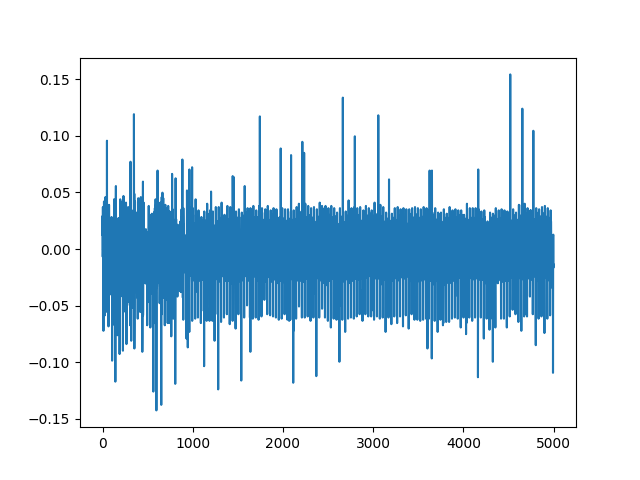

In [276]:
%matplotlib notebook
import matplotlib.pylab as plt

plt.figure()
plt.plot(trace_array[0])

<IPython.core.display.Javascript object>


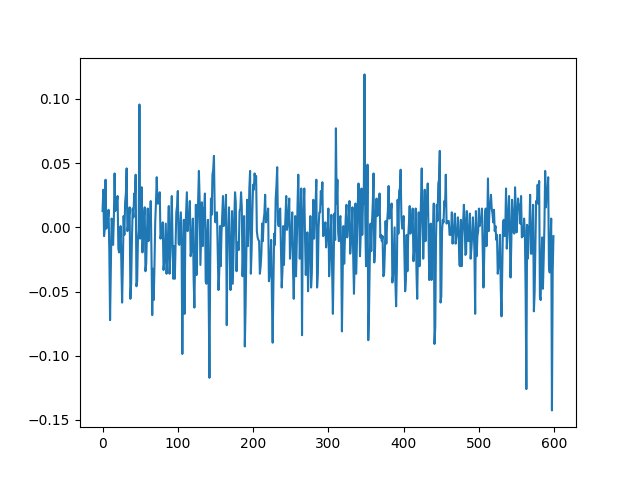

In [277]:
trace_array_sub = trace_array[:,:600]
plt.figure()
plt.plot(trace_array_sub[0])

In [143]:
def montgomery_reduce_s(a):
    # print(a)
    t = np.int16(0)
    # print("a type", type(a))
    # print("int16_t a ", np.int16(a))
    t = np.int16(a) * np.int16(-3327)
    # print("(int16_t)a * QINV  %d" % t)
    # print("(int32_t)t*KYBER_Q %d" % (np.int32(t) * np.int32(3329)))
    t1 = np.int32(t) * np.int32(3329)
    # print("(a - (int32_t)t*KYBER_Q) %d" %(np.int32(a) - t1))
    t = ((np.int32(a)-(np.int32(t) * np.int32(3329))) >> 16)
    t = np.int16(t)
    # print("t %d" %t)
    return t

def basemul_s(a, b, zeta):
    r = np.array([0, 0], dtype = 'int16')
    r[0]  = fqmul(np.int16(a[1]), np.int16(b[1]));
    r[0]  = fqmul(r[0], zeta);
    r[0] += fqmul(a[0], b[0]);
    r[1]  = fqmul(a[0], b[1]);
    r[1] += fqmul(a[1], b[0]);
    return r


In [66]:
def fast_fqmul(key, b):
    key = np.int16(key)
    b = np.int16(b)
    t2 = np.int32(key) * np.int32(b)
    t3 = np.int16(t2) * np.int16(-3327)
    t4 = np.int32(t3) * np.int32(3329)
    t5 = ((np.int32(t2) - (np.int32(t3) * np.int32(3329))) >> 16)
    t5 = np.int16(t5)
    return t5

In [106]:
zetas = [-1044,  -758,  -359, -1517,  1493,  1422,   287,   202,
   -171,   622,  1577,   182,   962, -1202, -1474,  1468,
    573, -1325,   264,   383,  -829,  1458, -1602,  -130,
   -681,  1017,   732,   608, -1542,   411,  -205, -1571,
   1223,   652,  -552,  1015, -1293,  1491,  -282, -1544,
    516,    -8,  -320,  -666, -1618, -1162,   126,  1469,
   -853,   -90,  -271,   830,   107, -1421,  -247,  -951,
   -398,   961, -1508,  -725,   448, -1065,   677, -1275,
  -1103,   430,   555,   843, -1251,   871,  1550,   105,
    422,   587,   177,  -235,  -291,  -460,  1574,  1653,
   -246,   778,  1159,  -147,  -777,  1483,  -602,  1119,
  -1590,   644,  -872,   349,   418,   329,  -156,   -75,
    817,  1097,   603,   610,  1322, -1285, -1465,   384,
  -1215,  -136,  1218, -1335,  -874,   220, -1187, -1659,
  -1185, -1530, -1278,   794, -1510,  -854,  -870,   478,
   -108,  -308,   996,   991,   958, -1460,  1522,  1628]

In [72]:
from tqdm import tnrange
from tqdm.auto import tqdm
import gc
import numpy as np
import sys
import unittest
import os
import time
import timeit
import pyaes
sys.path.append(r"D:\Github\Python_Kyber")
from aes_drbg import AES_DRBG
from kem import *

g.set_mode(2)

a = montgomery_reduce(16)
b = montgomery_reduce_s(16)
print(a)
print(b)

setup_code = """
from __main__ import fqmul, fast_fqmul
a = 243
b = 137
"""

# 测量fqmul函数
rt = timeit.timeit('fqmul(a, b)', setup=setup_code, number=10000)

# 测量fast_fqmul函数
rt2 = timeit.timeit('fast_fqmul(a, b)', setup=setup_code, number=10000)
print(rt)
print(rt2)

-625
-625
0.003318400002171984
0.06383930000083637


C:\Users\admin\AppData\Local\Temp\ipykernel_20224\4207786390.py:6: RuntimeWarning: overflow encountered in short_scalars
  t = np.int16(a) * np.int16(-3327)
C:\Users\admin\AppData\Local\Temp\ipykernel_20224\2094863462.py:5: RuntimeWarning: overflow encountered in short_scalars
  t3 = np.int16(t2) * np.int16(-3327)


In [111]:
def kyber_internal(ciphertext,secert):
    return fast_fqmul(secert,ciphertext)

def hw_cal(t):
    return bin(t).count("1")

def haming_weight(number):
    cnt = 0
    check = 0x1
    for _ in range(16):
        if (number & check):
            cnt +=1
            check = (check << 1)
        else:
            check = (check << 1)
    return cnt

import numpy as np

def mean(X):
    return np.sum(X, axis=0)/len(X)

def std_dev(X, X_bar):
    return np.sqrt(np.sum((X-X_bar)**2, axis=0))

def cov(X, X_bar, Y, Y_bar):
    return np.sum((X-X_bar)*(Y-Y_bar), axis=0)

In [146]:
print(haming_weight(243) == hw_cal(243))
print(fqmul(243,172) == fast_fqmul(243,172))
r = [int(),int()]
basemul(r,sk_array,ct_array_f[0],-1103)
print(r,basemul_s(sk_array,ct_array_f[0],-1103))

True
True
[915, 1545] [ 898 1545]


C:\Users\admin\AppData\Local\Temp\ipykernel_20224\2094863462.py:5: RuntimeWarning: overflow encountered in short_scalars
  t3 = np.int16(t2) * np.int16(-3327)


In [293]:
from tqdm import tnrange
maxcpa = [0] * 3329

ta = trace_array

t_bar = mean(ta)
o_t = std_dev(ta, t_bar)

for sguess in tnrange(0,3329):
    hws = np.array([[hw_cal(kyber_internal(list(b.vec[0].coeffs)[1],sguess)) for b in b_array]]).transpose()
    #print(hws)
    hws_bar = mean(hws)
    o_hws = std_dev(hws, hws_bar)
    #print(o_hws)
    correlation = cov(ta, t_bar, hws, hws_bar)
    cpaoutput = correlation/(o_t*o_hws)
    maxcpa[sguess] = max(abs(cpaoutput))

guess = np.argmax(maxcpa)
guess_corr = max(maxcpa)

print("Key guess: ", guess)
print("Correlation: ", guess_corr)

C:\Users\admin\AppData\Local\Temp\ipykernel_20224\1960423713.py:9: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for sguess in tnrange(0,3329):


  0%|          | 0/3329 [00:00<?, ?it/s]

C:\Users\admin\AppData\Local\Temp\ipykernel_20224\1960423713.py:16: RuntimeWarning: invalid value encountered in divide
  cpaoutput = correlation/(o_t*o_hws)
C:\Users\admin\AppData\Local\Temp\ipykernel_20224\2094863462.py:5: RuntimeWarning: overflow encountered in short_scalars
  t3 = np.int16(t2) * np.int16(-3327)


Key guess:  0
Correlation:  nan


In [294]:
import sys
import time

# 假设这是你的列表
your_list = maxcpa

# 先获取排序前的值和原始索引
indexed_list = [(value, index) for index, value in enumerate(your_list)]

# 按值从高到低排序
sorted_indexed_list = sorted(indexed_list, key=lambda x: x[0], reverse=True)

# 获取排序后的值列表，用于确定新索引
sorted_values = [item[0] for item in sorted_indexed_list]

# 计算排序后每个元素的新索引
new_indices = [sorted_values.index(value) for value in your_list]

# 打印排序后的元素值、原始索引和新索引
for value, original_index, new_index in zip(sorted_indexed_list, new_indices, range(len(sorted_indexed_list))):
    time.sleep(0.01)
    print(f"Value: {value[0]}, Original Index: {value[1]}, New Index: {new_index}")

Value: nan, Original Index: 0, New Index: 0
Value: 0.3205433252279944, Original Index: 2285, New Index: 1
Value: 0.3155822861665478, Original Index: 1044, New Index: 2
Value: 0.1812646615654685, Original Index: 2088, New Index: 3
Value: 0.1790766608284885, Original Index: 1241, New Index: 4
Value: 0.17122781359837153, Original Index: 522, New Index: 5
Value: 0.17122781359837153, Original Index: 2807, New Index: 6
Value: 0.1490483411482031, Original Index: 261, New Index: 7
Value: 0.1490483411482031, Original Index: 3068, New Index: 8
Value: 0.13299437125564786, Original Index: 2412, New Index: 9
Value: 0.13093165268875023, Original Index: 917, New Index: 10
Value: 0.12396637353714927, Original Index: 87, New Index: 11
Value: 0.12396637353714927, Original Index: 3242, New Index: 12
Value: 0.12241070234655627, Original Index: 1484, New Index: 13
Value: 0.12040191349021119, Original Index: 1845, New Index: 14
Value: 0.1187780646715488, Original Index: 640, New Index: 15
Value: 0.118456918

Value: 0.10040495328484922, Original Index: 1039, New Index: 132
Value: 0.1003721280576562, Original Index: 249, New Index: 133
Value: 0.10031756187694241, Original Index: 1234, New Index: 134
Value: 0.10027213701998351, Original Index: 2594, New Index: 135
Value: 0.10026376902827454, Original Index: 2292, New Index: 136
Value: 0.10025702159269707, Original Index: 58, New Index: 137
Value: 0.10025702159269707, Original Index: 3271, New Index: 138
Value: 0.1002274675893119, Original Index: 1172, New Index: 139
Value: 0.10019209089212402, Original Index: 1752, New Index: 140
Value: 0.10015414793721562, Original Index: 1536, New Index: 141
Value: 0.10013930669610488, Original Index: 363, New Index: 142
Value: 0.10008840545015542, Original Index: 172, New Index: 143
Value: 0.10008654152895965, Original Index: 735, New Index: 144
Value: 0.10008128281137602, Original Index: 1507, New Index: 145
Value: 0.1000556683541415, Original Index: 2864, New Index: 146
Value: 0.10003751202541505, Origin

Value: 0.09629613970395075, Original Index: 562, New Index: 260
Value: 0.09628269745888679, Original Index: 2812, New Index: 261
Value: 0.0962822270309852, Original Index: 588, New Index: 262
Value: 0.09627581677529994, Original Index: 1959, New Index: 263
Value: 0.09626341823257681, Original Index: 2417, New Index: 264
Value: 0.09625348211209514, Original Index: 1564, New Index: 265
Value: 0.096232217446882, Original Index: 632, New Index: 266
Value: 0.09618795051412993, Original Index: 1705, New Index: 267
Value: 0.0961824881986736, Original Index: 2357, New Index: 268
Value: 0.09616681432472551, Original Index: 1222, New Index: 269
Value: 0.09616597259260139, Original Index: 608, New Index: 270
Value: 0.09615720260960735, Original Index: 1462, New Index: 271
Value: 0.0961274584957457, Original Index: 2193, New Index: 272
Value: 0.0960874057280622, Original Index: 831, New Index: 273
Value: 0.0960781782791361, Original Index: 925, New Index: 274
Value: 0.09606025579622306, Original I

Value: 0.09373715842928064, Original Index: 458, New Index: 394
Value: 0.09370336495940548, Original Index: 2475, New Index: 395
Value: 0.09368542318854925, Original Index: 979, New Index: 396
Value: 0.09366331011286091, Original Index: 2026, New Index: 397
Value: 0.09365007427978965, Original Index: 777, New Index: 398
Value: 0.09364548458604957, Original Index: 1900, New Index: 399
Value: 0.09361271820683008, Original Index: 3259, New Index: 400
Value: 0.09359688065997494, Original Index: 2321, New Index: 401
Value: 0.0935423269158628, Original Index: 2871, New Index: 402
Value: 0.09353334085474337, Original Index: 168, New Index: 403
Value: 0.09352442599603085, Original Index: 3125, New Index: 404
Value: 0.09350053406292437, Original Index: 1519, New Index: 405
Value: 0.09344543699654337, Original Index: 2017, New Index: 406
Value: 0.09343898340664529, Original Index: 1476, New Index: 407
Value: 0.0934148347948501, Original Index: 2103, New Index: 408
Value: 0.09340989402610805, Ori

Value: 0.09205112196202167, Original Index: 541, New Index: 532
Value: 0.09204655868724859, Original Index: 2733, New Index: 533
Value: 0.09203778480715302, Original Index: 519, New Index: 534
Value: 0.09203434181475917, Original Index: 1668, New Index: 535
Value: 0.09201960174526183, Original Index: 1355, New Index: 536
Value: 0.09201844270837252, Original Index: 593, New Index: 537
Value: 0.09200534236509289, Original Index: 2302, New Index: 538
Value: 0.09200243095743807, Original Index: 944, New Index: 539
Value: 0.09200205731537987, Original Index: 14, New Index: 540
Value: 0.09200181340510345, Original Index: 482, New Index: 541
Value: 0.09199868601070073, Original Index: 1816, New Index: 542
Value: 0.09199518194879264, Original Index: 2289, New Index: 543
Value: 0.09199510191329331, Original Index: 419, New Index: 544
Value: 0.09199449798870976, Original Index: 759, New Index: 545
Value: 0.0919769317956416, Original Index: 1076, New Index: 546
Value: 0.09197635127412623, Origina

Value: 0.09067228045072132, Original Index: 1702, New Index: 670
Value: 0.0906504990615182, Original Index: 457, New Index: 671
Value: 0.0906453586121141, Original Index: 854, New Index: 672
Value: 0.09063916717068608, Original Index: 2868, New Index: 673
Value: 0.09063700580751961, Original Index: 1912, New Index: 674
Value: 0.09063185532848406, Original Index: 2840, New Index: 675
Value: 0.09062746487756448, Original Index: 2629, New Index: 676
Value: 0.09062417241055508, Original Index: 2062, New Index: 677
Value: 0.0906209199993519, Original Index: 2567, New Index: 678
Value: 0.09059831221055573, Original Index: 3021, New Index: 679
Value: 0.09059575434637797, Original Index: 1666, New Index: 680
Value: 0.09059265315765717, Original Index: 226, New Index: 681
Value: 0.09059167780790744, Original Index: 2941, New Index: 682
Value: 0.0905894247757875, Original Index: 1214, New Index: 683
Value: 0.090588550045334, Original Index: 2233, New Index: 684
Value: 0.09057415148964645, Origin

Value: 0.08973350164513316, Original Index: 2926, New Index: 810
Value: 0.0897101358163881, Original Index: 2422, New Index: 811
Value: 0.08969914297275104, Original Index: 130, New Index: 812
Value: 0.08968876713878347, Original Index: 2016, New Index: 813
Value: 0.08967751404191117, Original Index: 85, New Index: 814
Value: 0.08967382898835571, Original Index: 1949, New Index: 815
Value: 0.08966453155649141, Original Index: 1004, New Index: 816
Value: 0.0896595082082049, Original Index: 1714, New Index: 817
Value: 0.08965328678857121, Original Index: 2459, New Index: 818
Value: 0.08963962549736992, Original Index: 2619, New Index: 819
Value: 0.08963422290009798, Original Index: 174, New Index: 820
Value: 0.08963422290009798, Original Index: 3155, New Index: 821
Value: 0.08963149973123775, Original Index: 1750, New Index: 822
Value: 0.08962697513393855, Original Index: 1061, New Index: 823
Value: 0.08962463400366551, Original Index: 898, New Index: 824
Value: 0.08962157516741634, Orig

Value: 0.08866042712479183, Original Index: 697, New Index: 950
Value: 0.08865031611449786, Original Index: 1821, New Index: 951
Value: 0.08864496752358376, Original Index: 1595, New Index: 952
Value: 0.08859838278543819, Original Index: 2461, New Index: 953
Value: 0.08859018034690959, Original Index: 1922, New Index: 954
Value: 0.08858717682757342, Original Index: 2271, New Index: 955
Value: 0.08858124757877624, Original Index: 1071, New Index: 956
Value: 0.0885801805054836, Original Index: 331, New Index: 957
Value: 0.08856888911639853, Original Index: 1956, New Index: 958
Value: 0.08854985459935527, Original Index: 271, New Index: 959
Value: 0.0885484846347769, Original Index: 2998, New Index: 960
Value: 0.08854360491658446, Original Index: 1951, New Index: 961
Value: 0.08854223324149965, Original Index: 1843, New Index: 962
Value: 0.08854100425955652, Original Index: 661, New Index: 963
Value: 0.08853525163098566, Original Index: 2847, New Index: 964
Value: 0.088532724596124, Origi

Value: 0.08778271008686006, Original Index: 3079, New Index: 1086
Value: 0.08778015214010704, Original Index: 3076, New Index: 1087
Value: 0.08777876931660097, Original Index: 1319, New Index: 1088
Value: 0.08777801536166296, Original Index: 2344, New Index: 1089
Value: 0.08776262172515456, Original Index: 2872, New Index: 1090
Value: 0.08775772944205598, Original Index: 26, New Index: 1091
Value: 0.08774366881478192, Original Index: 528, New Index: 1092
Value: 0.0877271705795607, Original Index: 1926, New Index: 1093
Value: 0.08772405232223224, Original Index: 3312, New Index: 1094
Value: 0.08772368721921311, Original Index: 1463, New Index: 1095
Value: 0.08772351273354442, Original Index: 1104, New Index: 1096
Value: 0.08771089677592515, Original Index: 585, New Index: 1097
Value: 0.08770161277137652, Original Index: 2283, New Index: 1098
Value: 0.08769629442771015, Original Index: 2659, New Index: 1099
Value: 0.08768756061008234, Original Index: 192, New Index: 1100
Value: 0.0876865

Value: 0.08693654157032045, Original Index: 560, New Index: 1222
Value: 0.08693374180710337, Original Index: 647, New Index: 1223
Value: 0.08693320354667634, Original Index: 2259, New Index: 1224
Value: 0.08693239716281564, Original Index: 1331, New Index: 1225
Value: 0.08692788530778377, Original Index: 1011, New Index: 1226
Value: 0.08692133532322169, Original Index: 257, New Index: 1227
Value: 0.08691983148307808, Original Index: 2855, New Index: 1228
Value: 0.08691418197166988, Original Index: 516, New Index: 1229
Value: 0.08690759369547638, Original Index: 1860, New Index: 1230
Value: 0.08690377699603065, Original Index: 161, New Index: 1231
Value: 0.08690303488100957, Original Index: 1509, New Index: 1232
Value: 0.08690228280628144, Original Index: 306, New Index: 1233
Value: 0.08690019061155525, Original Index: 2200, New Index: 1234
Value: 0.08688551835654507, Original Index: 2269, New Index: 1235
Value: 0.08687957583083954, Original Index: 3251, New Index: 1236
Value: 0.0868770

Value: 0.08611743555297934, Original Index: 1175, New Index: 1357
Value: 0.08611519816765284, Original Index: 2802, New Index: 1358
Value: 0.08610607320948084, Original Index: 2394, New Index: 1359
Value: 0.08610526714625727, Original Index: 2561, New Index: 1360
Value: 0.08610290344043614, Original Index: 2592, New Index: 1361
Value: 0.0860943288928981, Original Index: 56, New Index: 1362
Value: 0.08609305420209849, Original Index: 843, New Index: 1363
Value: 0.08609052524817176, Original Index: 1243, New Index: 1364
Value: 0.08609040426781507, Original Index: 1482, New Index: 1365
Value: 0.08608887296271125, Original Index: 1876, New Index: 1366
Value: 0.08607888453208959, Original Index: 78, New Index: 1367
Value: 0.08607885374509153, Original Index: 1911, New Index: 1368
Value: 0.08607357389067467, Original Index: 928, New Index: 1369
Value: 0.0860662351017066, Original Index: 3248, New Index: 1370
Value: 0.08606225263391729, Original Index: 199, New Index: 1371
Value: 0.0860579133

Value: 0.0853987746515662, Original Index: 1338, New Index: 1483
Value: 0.08538962126659917, Original Index: 2319, New Index: 1484
Value: 0.08538760024742253, Original Index: 577, New Index: 1485
Value: 0.08538315345638761, Original Index: 3160, New Index: 1486
Value: 0.08538132805999463, Original Index: 1120, New Index: 1487
Value: 0.08537813354253568, Original Index: 2020, New Index: 1488
Value: 0.08537546055181398, Original Index: 1542, New Index: 1489
Value: 0.08537502363118842, Original Index: 2181, New Index: 1490
Value: 0.08537262708574099, Original Index: 3067, New Index: 1491
Value: 0.08536599569794881, Original Index: 2484, New Index: 1492
Value: 0.08536569976563808, Original Index: 2731, New Index: 1493
Value: 0.08534287420801623, Original Index: 1405, New Index: 1494
Value: 0.08533970131290314, Original Index: 2438, New Index: 1495
Value: 0.08533597100246017, Original Index: 2235, New Index: 1496
Value: 0.08533182258305491, Original Index: 1459, New Index: 1497
Value: 0.085

Value: 0.08471480413089744, Original Index: 3313, New Index: 1619
Value: 0.08470934485552575, Original Index: 3308, New Index: 1620
Value: 0.08470736944673331, Original Index: 3204, New Index: 1621
Value: 0.08470208189169678, Original Index: 2024, New Index: 1622
Value: 0.08469428697244591, Original Index: 1787, New Index: 1623
Value: 0.0846929192378749, Original Index: 1147, New Index: 1624
Value: 0.08469282677828878, Original Index: 1502, New Index: 1625
Value: 0.08468984776148498, Original Index: 81, New Index: 1626
Value: 0.08468216442829872, Original Index: 300, New Index: 1627
Value: 0.08467145860767834, Original Index: 2624, New Index: 1628
Value: 0.08466564332660965, Original Index: 1983, New Index: 1629
Value: 0.08465843568960496, Original Index: 2795, New Index: 1630
Value: 0.08465237312666365, Original Index: 362, New Index: 1631
Value: 0.0846464621877221, Original Index: 2921, New Index: 1632
Value: 0.08463116581485486, Original Index: 1782, New Index: 1633
Value: 0.0846273

Value: 0.08397759911441932, Original Index: 462, New Index: 1755
Value: 0.08397260785445747, Original Index: 1187, New Index: 1756
Value: 0.08397079704126596, Original Index: 1107, New Index: 1757
Value: 0.0839703393641626, Original Index: 344, New Index: 1758
Value: 0.08396107588161303, Original Index: 2705, New Index: 1759
Value: 0.0839567488951333, Original Index: 550, New Index: 1760
Value: 0.08395347401662955, Original Index: 1488, New Index: 1761
Value: 0.08395070378856002, Original Index: 2534, New Index: 1762
Value: 0.08394538840106512, Original Index: 1891, New Index: 1763
Value: 0.08391777136548481, Original Index: 2282, New Index: 1764
Value: 0.08391610785073605, Original Index: 1537, New Index: 1765
Value: 0.08391535149276466, Original Index: 1940, New Index: 1766
Value: 0.08390393121071478, Original Index: 2162, New Index: 1767
Value: 0.08390265078241334, Original Index: 2646, New Index: 1768
Value: 0.0839025234889052, Original Index: 916, New Index: 1769
Value: 0.08390059

Value: 0.08328211294848026, Original Index: 2008, New Index: 1893
Value: 0.08327775278616933, Original Index: 1452, New Index: 1894
Value: 0.08327533045703933, Original Index: 2487, New Index: 1895
Value: 0.08327426196989667, Original Index: 42, New Index: 1896
Value: 0.08327341525312905, Original Index: 2994, New Index: 1897
Value: 0.08326362387195069, Original Index: 2898, New Index: 1898
Value: 0.08325955826269844, Original Index: 549, New Index: 1899
Value: 0.08325450747678738, Original Index: 2637, New Index: 1900
Value: 0.08324189406197437, Original Index: 2781, New Index: 1901
Value: 0.0832410282986505, Original Index: 1931, New Index: 1902
Value: 0.08323910568167124, Original Index: 610, New Index: 1903
Value: 0.08323577564289679, Original Index: 1272, New Index: 1904
Value: 0.08323175032248024, Original Index: 3216, New Index: 1905
Value: 0.08322291787281091, Original Index: 3044, New Index: 1906
Value: 0.08320886599986146, Original Index: 1884, New Index: 1907
Value: 0.083200

Value: 0.08267631168569954, Original Index: 590, New Index: 2030
Value: 0.08267076527694332, Original Index: 2995, New Index: 2031
Value: 0.08266748074891483, Original Index: 806, New Index: 2032
Value: 0.08266079280848679, Original Index: 2514, New Index: 2033
Value: 0.08265786966030313, Original Index: 1882, New Index: 2034
Value: 0.08265566732187901, Original Index: 2750, New Index: 2035
Value: 0.08265559005974346, Original Index: 136, New Index: 2036
Value: 0.08264352844590246, Original Index: 1145, New Index: 2037
Value: 0.08263723314634487, Original Index: 3033, New Index: 2038
Value: 0.0826277337156355, Original Index: 743, New Index: 2039
Value: 0.08262692710980488, Original Index: 532, New Index: 2040
Value: 0.08261926181996417, Original Index: 503, New Index: 2041
Value: 0.08261836861386221, Original Index: 2542, New Index: 2042
Value: 0.08260413768489741, Original Index: 3275, New Index: 2043
Value: 0.08259239050884769, Original Index: 1603, New Index: 2044
Value: 0.08259033

Value: 0.08201721406522515, Original Index: 2059, New Index: 2166
Value: 0.08201610721288474, Original Index: 103, New Index: 2167
Value: 0.08201508077006264, Original Index: 3226, New Index: 2168
Value: 0.08201396887007943, Original Index: 2727, New Index: 2169
Value: 0.08200479268171039, Original Index: 2169, New Index: 2170
Value: 0.08200301161609123, Original Index: 2532, New Index: 2171
Value: 0.08200117770152912, Original Index: 74, New Index: 2172
Value: 0.08199462191127167, Original Index: 2005, New Index: 2173
Value: 0.08199451421801925, Original Index: 2183, New Index: 2174
Value: 0.0819919668449671, Original Index: 1879, New Index: 2175
Value: 0.08197223037518006, Original Index: 3188, New Index: 2176
Value: 0.08197159944040963, Original Index: 1461, New Index: 2177
Value: 0.08196965514429655, Original Index: 3049, New Index: 2178
Value: 0.08196300382261756, Original Index: 844, New Index: 2179
Value: 0.08195444584069327, Original Index: 2817, New Index: 2180
Value: 0.081954

Value: 0.08144962469976896, Original Index: 2281, New Index: 2292
Value: 0.0814466112234729, Original Index: 2184, New Index: 2293
Value: 0.0814455490407811, Original Index: 1389, New Index: 2294
Value: 0.08144027085951427, Original Index: 1958, New Index: 2295
Value: 0.08143960869769995, Original Index: 2891, New Index: 2296
Value: 0.0814335720460046, Original Index: 3221, New Index: 2297
Value: 0.08143308061467873, Original Index: 821, New Index: 2298
Value: 0.08143152846170158, Original Index: 3254, New Index: 2299
Value: 0.08142163465232716, Original Index: 2890, New Index: 2300
Value: 0.08142114327145439, Original Index: 2859, New Index: 2301
Value: 0.08141948547529286, Original Index: 1034, New Index: 2302
Value: 0.0814171598103244, Original Index: 472, New Index: 2303
Value: 0.08141444633432403, Original Index: 1205, New Index: 2304
Value: 0.0814060779026944, Original Index: 2732, New Index: 2305
Value: 0.0814058064645236, Original Index: 782, New Index: 2306
Value: 0.0814005492

Value: 0.08083775022772881, Original Index: 1431, New Index: 2430
Value: 0.08083757501541693, Original Index: 1919, New Index: 2431
Value: 0.08083155776480931, Original Index: 1013, New Index: 2432
Value: 0.0808205856729843, Original Index: 2058, New Index: 2433
Value: 0.08081970015272773, Original Index: 1797, New Index: 2434
Value: 0.08081921686073414, Original Index: 1154, New Index: 2435
Value: 0.08081478531587122, Original Index: 1930, New Index: 2436
Value: 0.08081427961652658, Original Index: 2316, New Index: 2437
Value: 0.08080255455031712, Original Index: 390, New Index: 2438
Value: 0.08080126637425947, Original Index: 1092, New Index: 2439
Value: 0.08079999567794463, Original Index: 840, New Index: 2440
Value: 0.08079413437196369, Original Index: 397, New Index: 2441
Value: 0.080790880826515, Original Index: 2392, New Index: 2442
Value: 0.0807846550434913, Original Index: 1902, New Index: 2443
Value: 0.08078329197834395, Original Index: 1526, New Index: 2444
Value: 0.08078088

Value: 0.08021080803258762, Original Index: 1679, New Index: 2565
Value: 0.08020841815216158, Original Index: 119, New Index: 2566
Value: 0.08020742792157194, Original Index: 2660, New Index: 2567
Value: 0.08019792090505933, Original Index: 2644, New Index: 2568
Value: 0.08019466668689314, Original Index: 1151, New Index: 2569
Value: 0.08018963931021916, Original Index: 2432, New Index: 2570
Value: 0.08018802742173675, Original Index: 1887, New Index: 2571
Value: 0.08017846843182101, Original Index: 1758, New Index: 2572
Value: 0.08017696560425575, Original Index: 2021, New Index: 2573
Value: 0.08017337610714818, Original Index: 3132, New Index: 2574
Value: 0.08017066452832555, Original Index: 350, New Index: 2575
Value: 0.08016174024127361, Original Index: 2915, New Index: 2576
Value: 0.08015959420801926, Original Index: 2830, New Index: 2577
Value: 0.08012967252858103, Original Index: 1616, New Index: 2578
Value: 0.08012842158515589, Original Index: 3247, New Index: 2579
Value: 0.080

Value: 0.07954242432110183, Original Index: 1612, New Index: 2691
Value: 0.07952601300045928, Original Index: 1895, New Index: 2692
Value: 0.07952350539939272, Original Index: 676, New Index: 2693
Value: 0.07951536186317756, Original Index: 1114, New Index: 2694
Value: 0.07951293090105739, Original Index: 2275, New Index: 2695
Value: 0.07951232614034126, Original Index: 2113, New Index: 2696
Value: 0.07950547727152939, Original Index: 2295, New Index: 2697
Value: 0.07950134453837958, Original Index: 761, New Index: 2698
Value: 0.07949905093777199, Original Index: 899, New Index: 2699
Value: 0.0794983085586406, Original Index: 2490, New Index: 2700
Value: 0.07949816233923843, Original Index: 336, New Index: 2701
Value: 0.0794892193200564, Original Index: 2695, New Index: 2702
Value: 0.0794767772849461, Original Index: 1141, New Index: 2703
Value: 0.07947141269200136, Original Index: 2863, New Index: 2704
Value: 0.07946956541650399, Original Index: 1726, New Index: 2705
Value: 0.07946930

Value: 0.07880118438571761, Original Index: 2159, New Index: 2817
Value: 0.07879330971057874, Original Index: 3081, New Index: 2818
Value: 0.07879308278929031, Original Index: 137, New Index: 2819
Value: 0.07877951524504785, Original Index: 1693, New Index: 2820
Value: 0.07877648074306114, Original Index: 1609, New Index: 2821
Value: 0.07876535955057246, Original Index: 2460, New Index: 2822
Value: 0.07876166242155073, Original Index: 1087, New Index: 2823
Value: 0.07875719029947195, Original Index: 3227, New Index: 2824
Value: 0.07875617780932301, Original Index: 2361, New Index: 2825
Value: 0.07875340740429282, Original Index: 1304, New Index: 2826
Value: 0.07875030401051261, Original Index: 1125, New Index: 2827
Value: 0.07873066964583865, Original Index: 447, New Index: 2828
Value: 0.0787289288861686, Original Index: 499, New Index: 2829
Value: 0.0787269901016973, Original Index: 2913, New Index: 2830
Value: 0.07871151719489557, Original Index: 3192, New Index: 2831
Value: 0.078701

Value: 0.07784570223749784, Original Index: 604, New Index: 2955
Value: 0.07782459755988323, Original Index: 2661, New Index: 2956
Value: 0.07781132994498671, Original Index: 342, New Index: 2957
Value: 0.07781010737186184, Original Index: 2920, New Index: 2958
Value: 0.07780868659159032, Original Index: 92, New Index: 2959
Value: 0.07779308529797696, Original Index: 2761, New Index: 2960
Value: 0.07778246735710125, Original Index: 1306, New Index: 2961
Value: 0.07777910536075203, Original Index: 314, New Index: 2962
Value: 0.07777789435085919, Original Index: 1695, New Index: 2963
Value: 0.07777670570101664, Original Index: 2455, New Index: 2964
Value: 0.07777663309095996, Original Index: 476, New Index: 2965
Value: 0.07777490357422737, Original Index: 2627, New Index: 2966
Value: 0.07777095507297306, Original Index: 1723, New Index: 2967
Value: 0.07776949068166299, Original Index: 1892, New Index: 2968
Value: 0.07776678251310579, Original Index: 2364, New Index: 2969
Value: 0.0777636

Value: 0.07674724742759777, Original Index: 1050, New Index: 3093
Value: 0.07673818501588181, Original Index: 2933, New Index: 3094
Value: 0.07672032178580182, Original Index: 2416, New Index: 3095
Value: 0.07671909006520664, Original Index: 2144, New Index: 3096
Value: 0.07669481281012341, Original Index: 2828, New Index: 3097
Value: 0.07668296568204884, Original Index: 2700, New Index: 3098
Value: 0.0766763021159346, Original Index: 3218, New Index: 3099
Value: 0.07667351948046999, Original Index: 1251, New Index: 3100
Value: 0.07667286145205497, Original Index: 513, New Index: 3101
Value: 0.07665690204303009, Original Index: 1682, New Index: 3102
Value: 0.0766531114660066, Original Index: 446, New Index: 3103
Value: 0.07664077432836791, Original Index: 2105, New Index: 3104
Value: 0.07662303339684166, Original Index: 1113, New Index: 3105
Value: 0.07662246781550226, Original Index: 2590, New Index: 3106
Value: 0.07661161993358723, Original Index: 1848, New Index: 3107
Value: 0.07660

Value: 0.07496700870407785, Original Index: 3007, New Index: 3231
Value: 0.074963678281781, Original Index: 628, New Index: 3232
Value: 0.07494423287851225, Original Index: 504, New Index: 3233
Value: 0.07492761358716513, Original Index: 894, New Index: 3234
Value: 0.07487697683027138, Original Index: 186, New Index: 3235
Value: 0.0748757948784254, Original Index: 3195, New Index: 3236
Value: 0.07487575839091809, Original Index: 1298, New Index: 3237
Value: 0.07487486537053646, Original Index: 2935, New Index: 3238
Value: 0.07485702457822005, Original Index: 3265, New Index: 3239
Value: 0.07485689889704558, Original Index: 2893, New Index: 3240
Value: 0.07483209088856392, Original Index: 346, New Index: 3241
Value: 0.07481621001797509, Original Index: 529, New Index: 3242
Value: 0.07476212589771282, Original Index: 1584, New Index: 3243
Value: 0.07473908613285797, Original Index: 2156, New Index: 3244
Value: 0.074734953983058, Original Index: 1015, New Index: 3245
Value: 0.074727664665

<IPython.core.display.Javascript object>


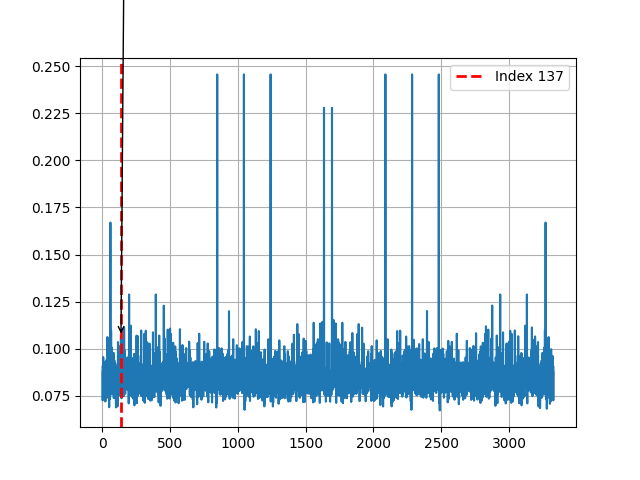

In [154]:
plt.figure()
plt.plot(maxcpa)
#print(maxcpa)
maxcpa_str = list(map(str, maxcpa))
special_index = 137
if special_index < len(maxcpa):  # 确保索引在有效范围内
    # 使用 axvline 标记位置
    plt.axvline(x=special_index, color='r', linestyle='--', linewidth=2, label=f'Index {special_index}')
    
    # 使用 annotate 添加注释
    plt.annotate(f'MaxCPA at index {special_index}',
                 xy=(special_index, maxcpa[special_index]),  # 注释指向的位置
                 xytext=(special_index + 5, maxcpa[special_index] + 5),  # 文本放置的位置
                 arrowprops=dict(facecolor='black', arrowstyle='->'),  # 箭头样式
                 )

# 添加图例
plt.legend()

# 显示网格线
plt.grid(True)

# 显示图表
plt.show()
#print(maxcpa_str)

In [292]:
b = np.array(bf_array)
b.shape

temp = []

for i in range(b.shape[0]):
    temp_b = []
    for index, value in enumerate(b[i]):
        if index < 2:
            if index == 0:
                b_1 = np.int16(0)
                b_1 += (np.int16(value)<<8)
            else:
                b_1 += (np.int16(value))
                temp_b.append(b_1)
        else:
            if index == 2:
                b_2 = np.int16(0)
                b_2 += (np.int16(value)<<8)
            else:
                b_2 += (np.int16(value))
                temp_b.append(b_2)
    temp.append(temp_b)
b = np.array(temp, dtype = 'int16')
b

array([[-1118,  -913],
       [ -782, -1621],
       [  986,   -61],
       ...,
       [ -197,  1630],
       [ -336,  -154],
       [ -843,   137]], dtype=int16)

In [279]:
from tqdm.notebook import tqdm 

# b = b[:10000]

# t2 = cp.int32()
result = np.int16(np.zeros(shape=(3329,2000)))
vf = np.vectorize(haming_weight)
b_1 = np.array(b[:2000, 1])

for key in tqdm(range(3329)):
    t2 = np.int32(key) * np.int32(b_1)
    t3 = np.int16(t2) * np.int16(-3327)
    t4 = np.int32(t3) * np.int32(3329)
    t5 = ((np.int32(t2) - (np.int32(t3) * np.int32(3329))) >> 16)
    t5 = np.int16(t5)
    result[key] = t5

  0%|          | 0/3329 [00:00<?, ?it/s]

In [280]:
vf = np.vectorize(haming_weight)

In [281]:
result.shape

(3329, 2000)

In [282]:
hw = np.zeros(shape=(3329, 2000), dtype = np.int8)
for i in tqdm(range(20)):
    re = np.array(result[:,i*100:i*100+100])
    hw[:, i*100:i*100+100] = vf(re)

  0%|          | 0/20 [00:00<?, ?it/s]

In [283]:
hw_t = hw.T

In [284]:
print(trace_array_sub.shape)
print(hw.shape)
print(hw_t.shape)

(2000, 600)
(3329, 2000)
(2000, 3329)


<IPython.core.display.Javascript object>


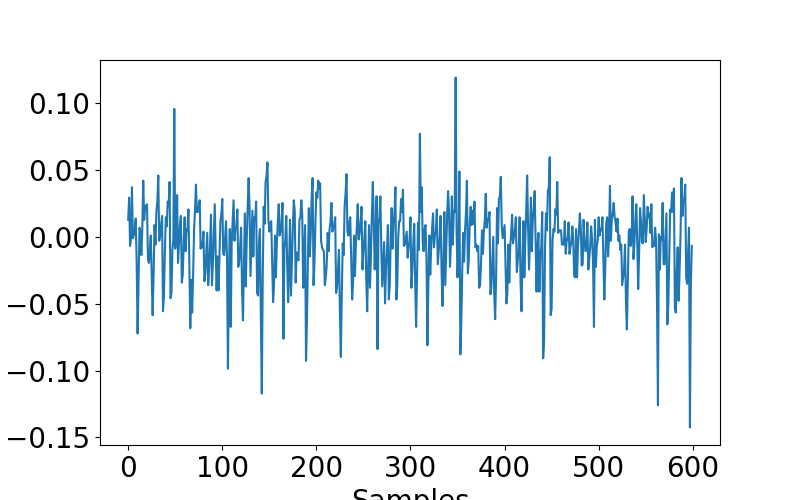

In [285]:
fig, ax = plt.subplots(1,1, figsize = (8, 5))

ax.plot(trace_array_sub[0])
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

ax.set_xlabel('Samples')
ax.set_ylabel('Power')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [286]:
traces = trace_array_sub

cor_result = []
limit = 2000
key_limit = 3329
for key in tqdm(range(0,key_limit,1000)):
    if key != 3000:
        temp_hw = hw_t[:,key*1:key*1+1000]
        total = np.concatenate((np.array(temp_hw[:limit]), np.array(traces[:limit])), axis = 1)
        cor = np.corrcoef(total.T)
        # print(cor.shape)
        temp = []
        for i in range(1000):
            temp.append(cor[i][1000:])
        temp = np.array(temp)
        cor_result.append(temp)
    else:
        temp_hw = hw_t[:,key*1:]
        total = np.concatenate((np.array(temp_hw[:limit]), np.array(traces[:limit])), axis = 1)
        cor = np.corrcoef(total.T)
        # print(cor.shape)
        temp = []
        for i in range(329):
            temp.append(cor[i][329:])
        temp = np.array(temp)
        cor_result.append(temp)

  0%|          | 0/4 [00:00<?, ?it/s]

In [287]:
# 初始化一个临时变量，用于后续叠加操作，避免直接修改原变量，保护原始数据
cor_result_temp = cor_result[0]

# 通过循环将cor_result中的后续矩阵逐个叠加到cor_result_temp中
# 选择使用循环是因为需要重复执行叠加操作三次，每次叠加一个矩阵
for i in range(3):
    cor_result_temp = np.vstack((cor_result_temp, cor_result[i+1]))

# 将处理后的临时变量赋值回原变量，完成数据的更新
cor_result = cor_result_temp

# 获取处理后矩阵的形状，用于了解数据的规模或进行后续处理的判断
cor_result.shape

(3329, 600)

In [288]:
cor_result = cor_result * -1

<IPython.core.display.Javascript object>


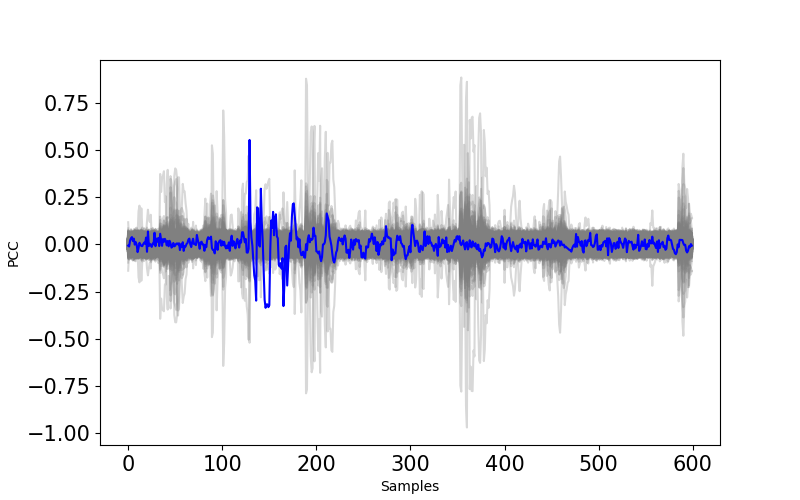

In [290]:
from matplotlib.patches import Rectangle
import matplotlib

# 创建一个图形窗口，并设置其大小
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

for i in range(3329):
    if i == 696:
        pass
    else:
        ax.plot(cor_result[i, :], alpha=0.3, color="gray")

ax.plot(cor_result[696], label="696", color="blue")

x = np.argmax(cor_result[696])
y = np.max(cor_result[696])

# 设置x轴和y轴标签的大小
#ax.xaxis.label.set_size(20)
#ax.yaxis.label.set_size(20)

# 设置图形的各个标签
plt.xlabel('Samples')
plt.ylabel('PCC')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# 显示图形
plt.show()

<IPython.core.display.Javascript object>


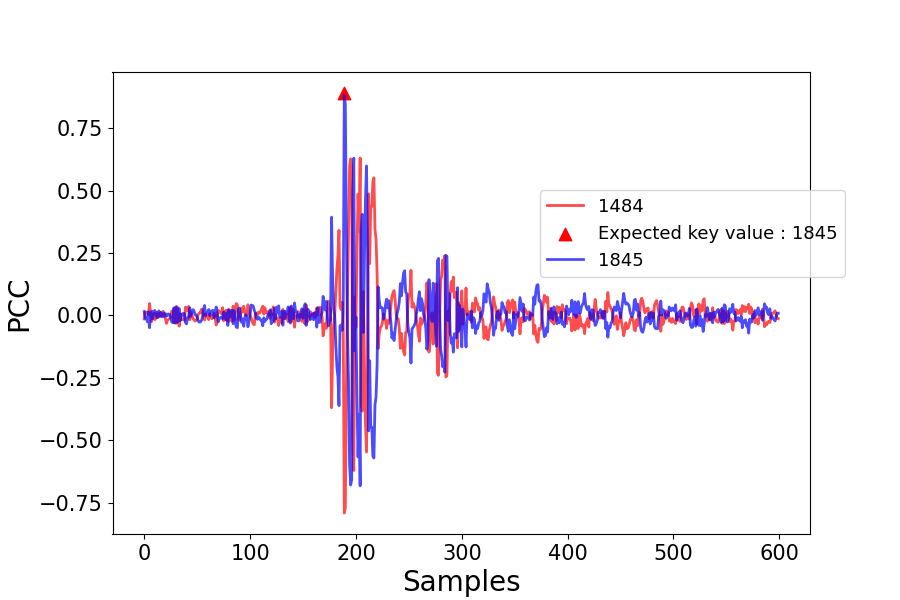

C:\Users\admin\AppData\Local\Temp\ipykernel_20224\467789366.py:7: RuntimeWarning: All-NaN slice encountered
  cor_max_result = np.where(np.nanmax(cor_result[:, 170:220], axis=-1) > 0.4)[0]
C:\Users\admin\AppData\Local\Temp\ipykernel_20224\467789366.py:12: RuntimeWarning: All-NaN slice encountered
  cor_max_index = np.nanargmax(np.nanmax(cor_result[:, 170:220], axis=-1))


In [291]:
# 初始化matplotlib图形，设置图形大小为9x6英寸
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

# 查找相关性矩阵中最大相关性值大于0.4的索引
# 这里解释了“为什么”进行此操作：为了找到具有高相关性的元素
# 키 후보군을 생성한다.
cor_max_result = np.where(np.nanmax(cor_result[:, 170:220], axis=-1) > 0.4)[0]

# 找到最大相关性值的索引
# 这里解释了“为什么”需要找到最大值的索引：为了标记最高相关性元素的位置
# 从相关性候选集合中找出最大值。
cor_max_index = np.nanargmax(np.nanmax(cor_result[:, 170:220], axis=-1))

# 初始化用于标记最高相关性位置的变量
cor_x = 0
cor_y = 0

# 遍历所有高相关性索引，绘制相关性曲线
# 对于不是最高相关性索引的元素，用红色绘制其曲线
for index in cor_max_result:
    if index != cor_max_index:
        ax.plot(cor_result[index], linewidth=2, alpha=0.7, label=f"{index}", color='red')
    else:
        # 更新最高相关性位置的x和y坐标
        # 获取最高点的x坐标。
        cor_x = np.nanargmax(cor_result[cor_max_index])
        # 获取最高点的y坐标。
        cor_y = np.nanmax(cor_result[cor_max_index])

# 在图表上标记最高相关性位置，使用蓝色绘制最高相关性曲线
ax.scatter(cor_x - 0.5, cor_y + 0.01, marker='^', color='red', s=80, label=f"Expected key value : {cor_max_index}")
ax.plot(cor_result[cor_max_index], linewidth=2, alpha=0.7, color='blue', label=f"{cor_max_index}")

# 设置轴标签和图例的字体大小
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

plt.xlabel('Samples')
plt.ylabel('PCC')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=13, loc='center left', bbox_to_anchor=(0.6, 0.65))

# 显示图表
plt.show()